In [1]:
!pip install -U --pre tensorflow=="2.*"
!pip install tf_slim

Requirement already up-to-date: tensorflow==2.* in /usr/local/lib/python3.6/dist-packages (2.4.0rc1)


In [2]:
import os
import pathlib

if "ML-From-Scratch" in pathlib.Path.cwd().parts:
  while "ML-From-Scratch" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('ML-From-Scratch').exists():
  !git clone --depth 1 https://github.com/eriklindernoren/ML-From-Scratch


In [3]:
cd ML-From-Scratch

/content/ML-From-Scratch


In [4]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing mlfromscratch.egg-info/PKG-INFO
writing dependency_links to mlfromscratch.egg-info/dependency_links.txt
writing requirements to mlfromscratch.egg-info/requires.txt
writing top-level names to mlfromscratch.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mlfromscratch.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mlfromscratch
creating build/bdist.linux-x86_64/egg/mlfromscratch/supervised_learning
copying build/lib/mlfromscratch/supervised_learning/particle_swarm_optimization.py -> build/bdist.linux-x86_64/egg/mlfromscratch/supervised_learning
copying build/lib/mlfromscratch/supervised_learning/gradient_boosting.py -> build/bdist.linux-x86_64/egg/mlfromscratch/supervised_learning
copying build/lib/mlfromscratch/supervised_learning/__init__.py -> buil

In [6]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import helper functions
from mlfromscratch.supervised_learning import PolynomialRidgeRegression
from mlfromscratch.utils import k_fold_cross_validation_sets, normalize, mean_squared_error
from mlfromscratch.utils import train_test_split, polynomial_features, Plot

In [7]:
# Load temperature data
data = pd.read_csv('mlfromscratch/data/TempLinkoping2016.txt', sep="\t")

In [10]:
time = np.atleast_2d(data["time"].values).T
temp = data["temp"].values

In [11]:
X = time # fraction of the year [0, 1]
y = temp

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [16]:
poly_degree = 15
# Finding regularization constant using cross validation
lowest_error = float("inf")
best_reg_factor = None
print("Finding regularization constant using cross validation:")
k = 10
for reg_factor in np.arange(0, 0.1, 0.01):
    cross_validation_sets = k_fold_cross_validation_sets(
        X_train, y_train, k=k)
    mse = 0
    for _X_train, _X_test, _y_train, _y_test in cross_validation_sets:
        model = PolynomialRidgeRegression(degree=poly_degree, 
                                        reg_factor=reg_factor,
                                        learning_rate=0.001,
                                        n_iterations=10000)
        model.fit(_X_train, _y_train)
        y_pred = model.predict(_X_test)
        _mse = mean_squared_error(_y_test, y_pred)
        mse += _mse
    mse /= k

    # Print the mean squared error
    print ("\tMean Squared Error: %s (regularization: %s)" % (mse, reg_factor))

    # Save reg. constant that gave lowest error
    if mse < lowest_error:
        best_reg_factor = reg_factor
        lowest_error = mse

Finding regularization constant using cross validation:


/content/ML-From-Scratch/mlfromscratch/utils/data_manipulation.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(sets)


	Mean Squared Error: 12.11627812995781 (regularization: 0.0)
	Mean Squared Error: 12.171117908933464 (regularization: 0.01)
	Mean Squared Error: 12.046805698594067 (regularization: 0.02)
	Mean Squared Error: 12.258260129140115 (regularization: 0.03)
	Mean Squared Error: 11.943992492980799 (regularization: 0.04)
	Mean Squared Error: 12.184204586010148 (regularization: 0.05)
	Mean Squared Error: 12.3133633303898 (regularization: 0.06)
	Mean Squared Error: 12.38380105898671 (regularization: 0.07)
	Mean Squared Error: 12.12916577942334 (regularization: 0.08)
	Mean Squared Error: 12.457259508031235 (regularization: 0.09)


In [29]:
# Make final prediction
model = PolynomialRidgeRegression(degree=poly_degree, 
                                reg_factor=best_reg_factor,
                                learning_rate=0.001,
                                n_iterations=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print ("Mean squared error: %s (given by reg. factor: %s)" % (lowest_error, best_reg_factor))


Mean squared error: 11.943992492980799 (given by reg. factor: 0.04)


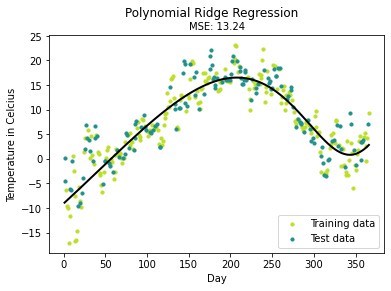

In [30]:
y_pred_line = model.predict(X)
# Color map
cmap = plt.get_cmap('viridis')

# Plot the results
m1 = plt.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
plt.plot(366 * X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.suptitle("Polynomial Ridge Regression")
plt.title("MSE: %.2f" % mse, fontsize=10)
plt.xlabel('Day')
plt.ylabel('Temperature in Celcius')
plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
plt.show()